In [33]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from utils import get_spike_activity, sdf, sdf_mean
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [34]:
rooth_path = "/home/nomodel/code/NODS/results/grid_search/"
with open("/home/nomodel/code/NODS/network_configuration.json", "r") as json_file:
    net_config = json.load(json_file)

CS_burst_dur = net_config["devices"]["CS"]["parameters"]["burst_dur"]
CS_start_first = float(net_config["devices"]["CS"]["parameters"]["start_first"])
between_start = net_config["devices"]["CS"]["parameters"]["between_start"]
n_trials = net_config["devices"]["CS"]["parameters"]["n_trials"]
US_start_first = float(net_config["devices"]["US"]["parameters"]["start_first"])

cell_color = net_config["cell_types"]["purkinje_cell"]["color"][0]
CS_color = net_config["colors"]["CS"]
US_color = net_config["colors"]["US"]
with_NO_color = net_config["devices"]["nNOS"]["color"][0]
without_NO_color = "#000000"

In [35]:
cell = "pc_spikes"
result_path = os.path.join(rooth_path,'4Hz/')
folder_path = result_path + f"min4_plus8/"

sdf_mean_trials_simulations = []

for k in range(6,7):
    file_path = os.path.join(folder_path, f"{k}/")
    spk = get_spike_activity(cell_name=cell, path=file_path)

    sdf_mean_over_trials = []
    step = 5
    for trial in range(n_trials):
        start = trial * between_start
        stop = CS_start_first + CS_burst_dur + trial * between_start
        sdf_cells = sdf(start=start, stop=stop, spk=spk, step=step)
        sdf_mean_trial = sdf_mean(sdf_cells)
        sdf_mean_over_trials.append(sdf_mean_trial)

    sdf_mean_trials_simulations.append(sdf_mean_over_trials)

sdf_mean_trials_simulations = np.array(sdf_mean_trials_simulations)
t_sim = sdf_mean_trials_simulations.shape[2]
sdf_concatenated = np.zeros(t_sim)

sdf_change_bs = np.zeros(n_trials)
sdf_change_cr = np.zeros(n_trials)

for trial in range(n_trials):
    concatenated_time = []
    for t in range(t_sim):
        concatenated_time = sdf_mean_trials_simulations[:, trial, t].tolist()
        sdf_concatenated[t] = np.median(concatenated_time)
    sdf_change_bs[trial] = np.median(sdf_concatenated[150:200])
    sdf_change_cr[trial] = np.median(sdf_concatenated[250:300])

sdf_change_bs = sdf_change_bs[1:] - sdf_change_bs[1]
sdf_change_cr = sdf_change_cr[1:] - sdf_change_cr[1]

In [36]:
folder_path = '/home/nomodel/code/NODS/results/grid_search/grid_NO/4Hz/0/'

sdf_mean_trials_simulations_NO = []

#for k in range(2, 3):
#file_path = os.path.join(folder_path, f"{k}/")
spk = get_spike_activity(cell_name=cell, path=folder_path)

sdf_mean_over_trials = []
step = 5
for trial in range(n_trials):
    start = trial * between_start
    stop = CS_start_first + CS_burst_dur + trial * between_start
    sdf_cells = sdf(start=start, stop=stop, spk=spk, step=step)
    sdf_mean_trial = sdf_mean(sdf_cells)
    sdf_mean_over_trials.append(sdf_mean_trial)

sdf_mean_trials_simulations_NO.append(sdf_mean_over_trials)

sdf_mean_trials_simulations_NO = np.array(sdf_mean_trials_simulations_NO)
t_sim = sdf_mean_trials_simulations.shape[2]
sdf_concatenated_NO = np.zeros(t_sim)

sdf_change_bs_NO = np.zeros(n_trials)
sdf_change_cr_NO = np.zeros(n_trials)

for trial in range(n_trials):
    concatenated_time = []
    for t in range(t_sim):
        concatenated_time = sdf_mean_trials_simulations_NO[:, trial, t].tolist()
        sdf_concatenated_NO[t] = np.median(concatenated_time)
        
    sdf_change_bs_NO[trial] = np.median(sdf_concatenated_NO[150:200])
    sdf_change_cr_NO[trial] = np.median(sdf_concatenated_NO[250:300])
    
sdf_change_bs_NO = sdf_change_bs_NO[1:] - sdf_change_bs_NO[1]
sdf_change_cr_NO = sdf_change_cr_NO[1:] - sdf_change_cr_NO[1]

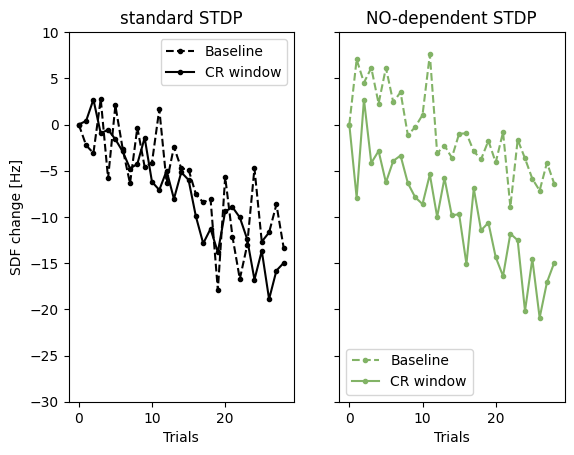

<Figure size 640x480 with 0 Axes>

In [37]:
fig,axs = plt.subplots(1,2,sharey=True)
axs[0].plot(sdf_change_bs,"--o",markersize=3,color=without_NO_color,label="Baseline")
axs[0].plot(sdf_change_cr, "-o", markersize=3, color=without_NO_color, label="CR window")
axs[1].plot(sdf_change_bs_NO,'--o',markersize=3,color=with_NO_color,label="Baseline")
axs[1].plot(sdf_change_cr_NO, "-o", markersize=3, color=with_NO_color, label="CR window")
axs[0].set_ylim(-30,10)
axs[0].set_xlabel("Trials")
axs[1].set_xlabel("Trials")
axs[0].set_ylabel("SDF change [Hz]")
axs[0].set_title("standard STDP")
axs[1].set_title("NO-dependent STDP")
axs[0].legend()
axs[1].legend()
plt.show()
plt.tight_layout()
# fig.suptitle("SDF change over trials", fontsize=16)
fig.savefig(rooth_path+f"sdf_change.png")